In [2]:
!pip install highlight_text

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
from matplotlib.patches import RegularPolygon
import matplotlib.patches as mpatches
from matplotlib import cm
import numpy as np
from matplotlib import cm
from highlight_text import fig_text, ax_text
from ast import literal_eval

from mplsoccer import Pitch, VerticalPitch, lines

from PIL import Image
import urllib
import os

In [2]:

plt.rcParams['font.family'] = 'DM Sans'

In [3]:
from matplotlib import font_manager
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

['C:\\Windows\\Fonts\\VerdanaPro-Black.ttf',
 'C:\\Windows\\Fonts\\simsunb.ttf',
 'C:\\Windows\\Fonts\\segoepr.ttf',
 'C:\\Windows\\Fonts\\FRAHV.TTF',
 'C:\\Windows\\Fonts\\BOD_CBI.TTF',
 'C:\\Windows\\Fonts\\KUNSTLER.TTF',
 'C:\\Windows\\Fonts\\CALISTBI.TTF',
 'C:\\Windows\\Fonts\\JUICE___.TTF',
 'C:\\Windows\\Fonts\\cour.ttf',
 'C:\\Windows\\Fonts\\HARLOWSI.TTF',
 'C:\\Windows\\Fonts\\ARIALN.TTF',
 'C:\\Windows\\Fonts\\LCALLIG.TTF',
 'C:\\Windows\\Fonts\\GILB____.TTF',
 'C:\\Windows\\Fonts\\comici.ttf',
 'C:\\Windows\\Fonts\\msuighur.ttf',
 'C:\\Windows\\Fonts\\BKANT.TTF',
 'C:\\Windows\\Fonts\\segoesc.ttf',
 'C:\\Windows\\Fonts\\PTBLSSTR.TTF',
 'C:\\Windows\\Fonts\\RockwellNova-ExtraBold.ttf',
 'C:\\Windows\\Fonts\\GeorgiaPro-Bold.ttf',
 'C:\\Windows\\Fonts\\RockwellNovaCond-Light.ttf',
 'C:\\Windows\\Fonts\\seguihis.ttf',
 'C:\\Windows\\Fonts\\himalaya.ttf',
 'C:\\Windows\\Fonts\\STENCIL.TTF',
 'C:\\Windows\\Fonts\\DTHULUTH.TTF',
 'C:\\Windows\\Fonts\\WINGDNG3.TTF',
 'C:\\Windows\\

In [75]:
data = pd.read_csv('SerieA23-24.csv', index_col=0, low_memory=False)
data['qualifiers'] = [literal_eval(x) for x in data['qualifiers']]

In [76]:
team_map = pd.read_csv('team_mapping.csv', encoding='utf-8')


In [77]:
data = pd.merge(data, team_map[['team_id', 'fotmob_id','cmap','color']], how='left', on='team_id')


In [78]:
data.columns

Index(['season', 'game', 'id', 'game_id', 'period', 'minute', 'second',
       'expanded_minute', 'type', 'outcome_type', 'team_id', 'team',
       'player_id', 'player', 'x', 'y', 'end_x', 'end_y', 'goal_mouth_y',
       'goal_mouth_z', 'blocked_x', 'blocked_y', 'qualifiers', 'is_touch',
       'is_shot', 'is_goal', 'card_type', 'related_event_id',
       'related_player_id', 'fotmob_id', 'cmap', 'color'],
      dtype='object')

In [80]:
interceptions = data[(data['type']=='Interception') & (data['outcome_type']=='Successful')]
tackles = data[(data['type']=='Tackle') & (data['outcome_type']=='Successful')]
pass_blocks = data[(data['type']=='BlockedPass') & (data['outcome_type']=='Successful') ]

In [81]:
ball_wins_df = pd.concat([interceptions, tackles, pass_blocks], axis=0)


In [82]:
teams = sorted(set(data['team']))

# Set up dictionary to store xt per 90 per team
team_ball_win_height = dict.fromkeys(teams, 0)
team_count = len(teams)

for team in teams:
    
    # Get team events
    team_id = data[data['team']==team]['fotmob_id'].values[0]
    team_ball_wins = ball_wins_df[ball_wins_df['fotmob_id']==team_id]
    
    # Get mean recovery height
    team_ball_win_height[team] = team_ball_wins['x'].mean()

In [83]:
team_ball_wins

,season,game,id,game_id,period,minute,second,expanded_minute,type,outcome_type,...,qualifiers,is_touch,is_shot,is_goal,card_type,related_event_id,related_player_id,fotmob_id,cmap,color
60,2324,2023-08-19 Empoli-Verona,2579105995,1746041,FirstHalf,4,5.0,4,Interception,Successful,...,"[{'type': {'displayName': 'Zone', 'value': 56}...",True,NaN,NaN,NaN,NaN,NaN,9876,YlOrBr,#FFE74A
75,2324,2023-08-19 Empoli-Verona,2579106615,1746041,FirstHalf,4,23.0,4,Interception,Successful,...,"[{'type': {'displayName': 'StandingSave', 'val...",True,NaN,NaN,NaN,NaN,NaN,9876,YlOrBr,#FFE74A
274,2324,2023-08-19 Empoli-Verona,2579117089,1746041,FirstHalf,17,11.0,17,Interception,Successful,...,"[{'type': {'displayName': 'Zone', 'value': 56}...",True,NaN,NaN,NaN,NaN,NaN,9876,YlOrBr,#FFE74A
282,2324,2023-08-19 Empoli-Verona,2579117763,1746041,FirstHalf,17,58.0,17,Interception,Successful,...,"[{'type': {'displayName': 'Zone', 'value': 56}...",True,NaN,NaN,NaN,NaN,NaN,9876,YlOrBr,#FFE74A
636,2324,2023-08-19 Empoli-Verona,2579144287,1746041,FirstHalf,46,36.0,46,Interception,Successful,...,"[{'type': {'displayName': 'StandingSave', 'val...",True,NaN,NaN,NaN,NaN,NaN,9876,YlOrBr,#FFE74A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236941,2324,2023-12-17 Fiorentina-Verona,2630071155,1746192,FirstHalf,38,16.0,38,BlockedPass,Successful,...,"[{'type': {'displayName': 'StandingSave', 'val...",True,NaN,NaN,NaN,NaN,NaN,9876,YlOrBr,#FFE74A
237265,2324,2023-12-17 Fiorentina-Verona,2630104767,1746192,SecondHalf,56,46.0,58,BlockedPass,Successful,...,"[{'type': {'displayName': 'Zone', 'value': 56}...",True,NaN,NaN,NaN,NaN,NaN,9876,YlOrBr,#FFE74A
256273,2324,2023-12-23 Verona-Cagliari,2632132665,1746212,FirstHalf,24,47.0,24,BlockedPass,Successful,...,"[{'type': {'displayName': 'Defensive', 'value'...",True,NaN,NaN,NaN,NaN,NaN,9876,YlOrBr,#FFE74A
256326,2324,2023-12-23 Verona-Cagliari,2632134707,1746212,FirstHalf,28,58.0,28,BlockedPass,Successful,...,[{'type': {'displayName': 'OppositeRelatedEven...,True,NaN,NaN,NaN,NaN,NaN,9876,YlOrBr,#FFE74A


In [84]:
team_ball_win_height = sorted(team_ball_win_height.items(), key=lambda x: x[1], reverse=True)

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
import matplotlib.gridspec as gridspec

# We'll only use a vertical pitch for this tutorial
from mplsoccer import VerticalPitch

from PIL import Image
import urllib
import os
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)


In [88]:
team_ball_wins.fotmob_id

60        9876
75        9876
274       9876
282       9876
636       9876
          ... 
236941    9876
237265    9876
256273    9876
256326    9876
256803    9876
Name: fotmob_id, Length: 402, dtype: int64

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from PIL import Image, ImageEnhance
from mplsoccer.pitch import VerticalPitch, Pitch
import matplotlib.patheffects as path_effects
import os
import sys
import bz2
import pickle
import numpy as np
from collections import Counter
import highlight_text as htext
import glob

findfont: Font family 'Qatar2022 Arabic' not found.
findfont: Font family 'Qatar2022 Arabic' not found.
findfont: Font family 'Qatar2022 Arabic' not found.
findfont: Font family 'Qatar2022 Arabic' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font fam

findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'Qatar2022 Arabic' not found.
findfont: Font family 'Qatar2022 Arabic' not found.
findfont: Font family 'Qatar2022 Arabic' not found.
findfont: Font family 'Qatar2022 Arabic' not found.
findfont: Font family 'Qatar2022 Arabic' not found.
findfont: Font family 'Qatar2022 Arabic' not found.
findfont: Font family 'DM Sans' not found.


findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: Font family 'DM Sans' not found.
findfont: F

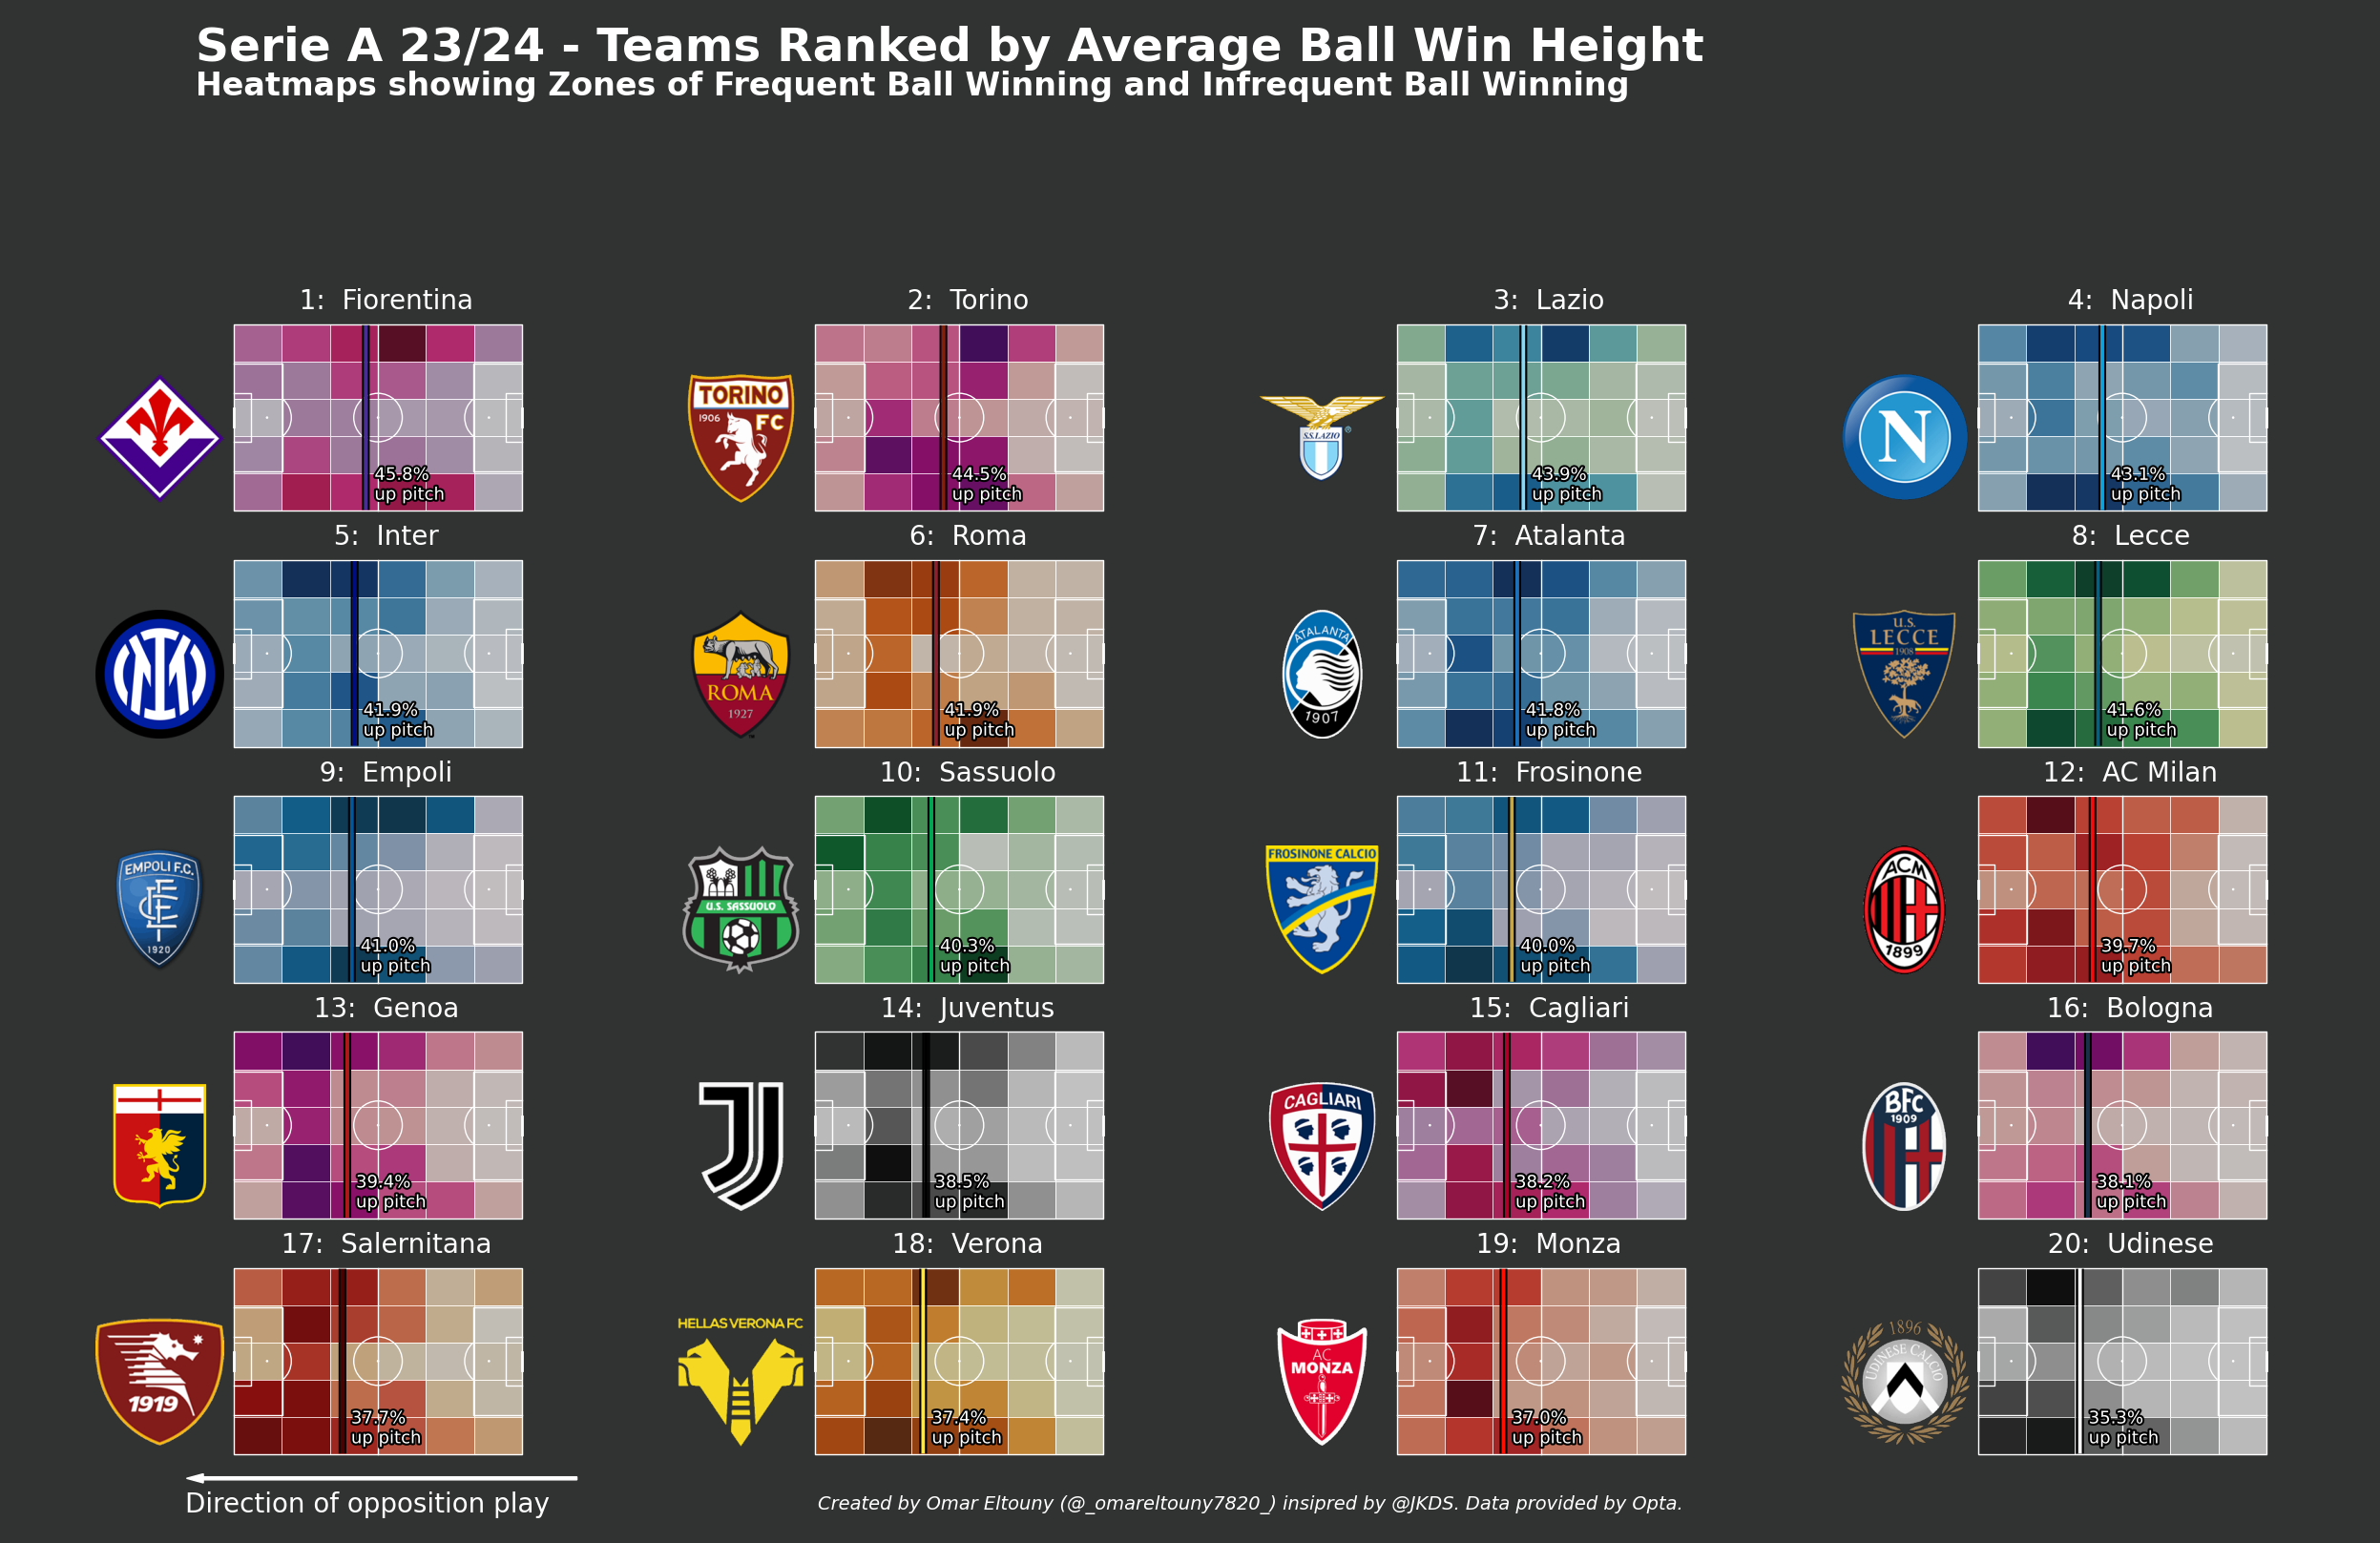

In [104]:
# %% Create visual

# Overwrite rcparams
mpl.rcParams['xtick.color'] = 'w'
mpl.rcParams['ytick.color'] = 'w'

# Set-up pitch subplots
pitch = Pitch(pitch_color='#313332', pitch_type='opta', line_color='white', linewidth=1, stripe=False)
fig, ax = pitch.grid(nrows=5, ncols=4, grid_height=0.8, title_height = 0.13, endnote_height = 0.04, space=0.12, axis=False)
fig.set_size_inches(25, 15)
fig.set_facecolor('#313332')
ax['pitch'] = ax['pitch'].reshape(-1)
idx = 0

# Loop through each team
for team in team_ball_win_height[0:20]:
    
    # Get team name and events
    team_name = team[0]
    team_id = data[data['team']==team_name]['fotmob_id'].values[0]
    team_ball_wins = ball_wins_df[ball_wins_df['fotmob_id']==team_id]
    color=data[data['team']==team_name]['color'].values[0]
    cmap=data[data['team']==team_name]['cmap'].values[0]
    # Get team logo and colour
    #team_logo, team_cmap = lab.get_team_badge_and_colour(team_name)

    # Draw heatmap
    bin_statistic = pitch.bin_statistic(team_ball_wins['x'], team_ball_wins['y'],
                                        statistic='count', bins=(6, 5), normalize=True)
    pitch.heatmap(bin_statistic, ax['pitch'][idx], cmap=cmap, edgecolor='w', lw=0.5, zorder=0, alpha=0.7)
    
    # Draw mean ball win pos
    pitch.lines(team[1], 0.5, team[1], 99.5, color=color, lw=3, zorder=2, ax=ax['pitch'][idx])
    pitch.lines(team[1]-1, 0.5, team[1]-1, 99.5, color='k', lw=1.5, zorder=4, ax=ax['pitch'][idx])
    pitch.lines(team[1]+1, 0.5, team[1]+1, 99.5, color='k', lw=1.5, zorder=4, ax=ax['pitch'][idx])
    path_eff = [path_effects.Stroke(linewidth=3, foreground='k'), path_effects.Normal()]
    ax['pitch'][idx].text(team[1]+3, 6, f"{round(team[1],1)}%\nup pitch", fontsize=13, color='w',path_effects = path_eff)

    # Label heatmap zones with pressure count if selected
    
    ax['pitch'][idx].set_title(f"  {idx + 1}:  {team_name}", loc = "center", color='w', fontsize = 20)
    
    # Add team logo
    ax_pos = ax['pitch'][idx].get_position()    
    image_ax = fig.add_axes([ax_pos.x1-0.2, ax_pos.y1-0.13, 0.09, 0.09])
    #logo_ax.axis("off")
    #logo_ax.imshow(team_logo)
  
    fotmob_url='SerieA/'
    club_icon = Image.open((f'{fotmob_url}{team_id:.0f}.png'))
    image_ax.imshow(club_icon)
    image_ax.axis('off')
    
    idx+=1

# Title
leagues = {'EPL': 'Premier League', 'La_Liga': 'La Liga', 'Bundesliga': 'Bundesliga', 'Serie_A': 'Serie A',
           'Ligue_1': 'Ligue 1', 'RFPL': 'Russian Premier Leauge', 'EFLC': 'EFL Championship', 'World_Cup': 'World Cup'}
league='Serie_A'
year=23
title_text = f"{leagues[league]} {year}/{int(year)+1} - Teams Ranked by Average Ball Win Height"
subtitle_text = "Heatmaps showing Zones of <Frequent Ball Winning> and <Infrequent Ball Winning>"
#subsubtitle_text = f"Correct as of {run_date}"

#fig.text(0.182, 1.0, title_text, fontweight="bold", fontsize=30, color='w')
#htext.fig_text(0.182, 0.98, s=subtitle_text, fontweight="bold", fontsize=25, color='w',
             #  highlight_textprops=[{"color": 'orange', "fontweight": 'bold'}, {"color": 'grey', "fontweight": 'bold'}])
#fig.text(0.12, 0.9, subsubtitle_text, fontweight="regular", fontsize=16, color='w')
    
# Add direction of play arrow
ax = fig.add_axes([0.046, 0.04, 0.18, 0.007])
ax.axis("off")
plt.arrow(0.61, 0.15, -0.1, 0, color="white")
fig.text(0.13, 0.02, "Direction of opposition play", ha="center", fontsize=20, color="white", fontweight="regular")

# Add footer text
fig.text(0.5, 0.022, "Created by Omar Eltouny (@_omareltouny7820_) insipred by @JKDS. Data provided by Opta.",
         fontstyle="italic", ha="center", fontsize=14, color="white")



Header = fig.add_axes((-0.02,0.95,0.78,0.12))
t = Header.transData
fig=Header.figure
canvas = fig.canvas
Header.axis('off')
Header.set_zorder(-1)
Header.set_facecolor('white')
Header.grid(False)
Header.text(s=f"{leagues[league]} {year}/{int(year)+1} - Teams Ranked by Average Ball Win Height",x=0.1,y=0.7,color='white',fontsize=35,font="Qatar2022 Arabic",fontweight='bold')    
Header.text(s="Heatmaps showing Zones of Frequent Ball Winning and Infrequent Ball Winning",x=0.1,y=0.5,color='white',fontsize=24,font="Qatar2022 Arabic",fontweight='bold')

t = Header.transData
fig = Header.figure
canvas = fig.canvas





plt.savefig('ballwinning.png',dpi=300,bbox_inches='tight')